# Problem 2: German Credit Dataset Analysis

This notebook performs preprocessing, analysis, and visualization on the German Credit dataset.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('GermanCredit.csv')
print("Dataset loaded successfully")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully
Shape: (1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


## Preprocessing (29 pts)

### Task 1: Drop the 3 columns that contribute the least to the dataset (8 pts)
These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns.

In [30]:
# Count 'none' values in each column
none_counts = {}
for col in df.columns:
    if df[col].dtype == 'object':
        none_count = (df[col] == 'none').sum()
        if none_count > 0:
            none_counts[col] = none_count

print("Columns with 'none' values:")
for col, count in sorted(none_counts.items(), key=lambda x: -x[1]):
    print(f"{col}: {count}")

# Find top 3 columns with most 'none' values
# Sort by count (descending) then by column position for ties
col_positions = {col: i for i, col in enumerate(df.columns)}
sorted_none_cols = sorted(none_counts.items(), key=lambda x: (-x[1], col_positions[x[0]]))
cols_to_drop = [col for col, count in sorted_none_cols[:3]]

print(f"\nDropping columns: {cols_to_drop}")
df = df.drop(columns=cols_to_drop)
print(f"New shape: {df.shape}")

Columns with 'none' values:
other_parties: 907
other_payment_plans: 814
own_telephone: 596

Dropping columns: ['other_parties', 'other_payment_plans', 'own_telephone']
New shape: (1000, 18)


### Task 2: Remove unnecessary apostrophes (4 pts)
Certain values in some of the columns contain unnecessary apostrophes ('). Remove the apostrophes.

In [31]:
# Remove apostrophes from all string columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace("'", "", regex=False)

print("Apostrophes removed from all string columns")
df.head()

Apostrophes removed from all string columns


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


### Task 3: Change checking_status column values (5 pts)
The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [32]:
# Map checking_status values
checking_status_map = {
    'no checking': 'No Checking',
    '<0': 'Low',
    '0<=X<200': 'Medium',
    '>=200': 'High'
}

df['checking_status'] = df['checking_status'].replace(checking_status_map)
print("checking_status values updated:")
print(df['checking_status'].value_counts())

checking_status values updated:
checking_status
No Checking    394
Low            274
Medium         269
High            63
Name: count, dtype: int64


### Task 4: Change savings_status column values (5 pts)
The savings_status column has values in 5 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively.

In [33]:
# Map savings_status values
savings_status_map = {
    'no known savings': 'No Savings',
    '<100': 'Low',
    '100<=X<500': 'Medium',
    '500<=X<1000': 'High',
    '>=1000': 'High'
}

df['savings_status'] = df['savings_status'].replace(savings_status_map)
print("savings_status values updated:")
print(df['savings_status'].value_counts())

savings_status values updated:
savings_status
Low           603
No Savings    183
High          111
Medium        103
Name: count, dtype: int64


### Task 5: Change class column values (3 pts)
Change class column values from 'good' to '1' and 'bad' to '0'.

In [34]:
# Map class values
df['class'] = df['class'].replace({'good': '1', 'bad': '0'})
print("class values updated:")
print(df['class'].value_counts())

class values updated:
class
1    700
0    300
Name: count, dtype: int64


### Task 6: Change employment column values (4 pts)
Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [35]:
# Map employment values
employment_map = {
    'unemployed': 'Unemployed',
    '<1': 'Amateur',
    '1<=X<4': 'Professional',
    '4<=X<7': 'Experienced',
    '>=7': 'Expert'
}

df['employment'] = df['employment'].replace(employment_map)
print("employment values updated:")
print(df['employment'].value_counts())

employment values updated:
employment
Professional    339
Expert          253
Experienced     174
Amateur         172
Unemployed       62
Name: count, dtype: int64


## Analysis (17 pts)

### Task 7: Crosstab - Count of foreign workers for each class (3 pts)
Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [36]:
# Crosstab for foreign_worker and class
crosstab_foreign_class = pd.crosstab(df['foreign_worker'], df['class'])
print("Count of foreign workers for each class:")
print(crosstab_foreign_class)

Count of foreign workers for each class:
class             0    1
foreign_worker          
no                4   33
yes             296  667


### Task 8: Crosstab - Count of employment for each savings_status (2 pts)
Get the count of each category of employment for each category of savings_status.

In [37]:
# Crosstab for employment and savings_status
crosstab_employment_savings = pd.crosstab(df['employment'], df['savings_status'])
print("Count of employment categories for each savings_status:")
print(crosstab_employment_savings)

Count of employment categories for each savings_status:
savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12


### Task 9: Average credit_amount for single males with 4<=X<7 years employment (4 pts)
Find the average credit_amount of single males that have 4<=X<7 years of employment (now 'Experienced').

In [40]:
# Filter for single males with Experienced employment
filtered = df[(df['personal_status'] == 'male single') & (df['employment'] == 'Experienced')]
avg_credit = filtered['credit_amount'].mean()
print(f"Average credit_amount for single males with Experienced employment: {avg_credit}")

Average credit_amount for single males with Experienced employment: 4142.592592592592


### Task 10: Average credit duration for each job type (4 pts)
Find the average credit duration for each of the job types.

In [41]:
# Average duration by job type
avg_duration_by_job = df.groupby('job')['duration'].mean()
print("Average credit duration for each job type:")
print(avg_duration_by_job)

Average credit duration for each job type:
job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64


### Task 11: Most common checking_status and savings_status for 'education' purpose (4 pts)
For the purpose 'education', what is the most common checking_status and savings_status?

In [42]:
# Filter for education purpose
education_df = df[df['purpose'] == 'education']

# Most common checking_status
most_common_checking = education_df['checking_status'].mode()[0]

# Most common savings_status
most_common_savings = education_df['savings_status'].mode()[0]

print(f"Most common checking status: {most_common_checking}")
print(f"Most common savings status: {most_common_savings}")

Most common checking status: No Checking
Most common savings status: Low


## Visualization (24 pts)

### Task 12: Subplots of bar charts - savings_status and checking_status to personal_status (9 pts)
Plot subplots of two bar charts: one for savings_status (x-axis) to personal_status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar should be of a different color.

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: savings_status to personal_status
crosstab_savings_personal = pd.crosstab(df['savings_status'], df['personal_status'])
crosstab_savings_personal.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Personal Status by Savings Status')
axes[0].set_xlabel('Savings Status')
axes[0].set_ylabel('Count')
axes[0].legend(title='Personal Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Second subplot: checking_status to personal_status
crosstab_checking_personal = pd.crosstab(df['checking_status'], df['personal_status'])
crosstab_checking_personal.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Personal Status by Checking Status')
axes[1].set_xlabel('Checking Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Personal Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Task 13: Bar graph - property_magnitude to average age for credit_amount > 4000 (9 pts)
For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

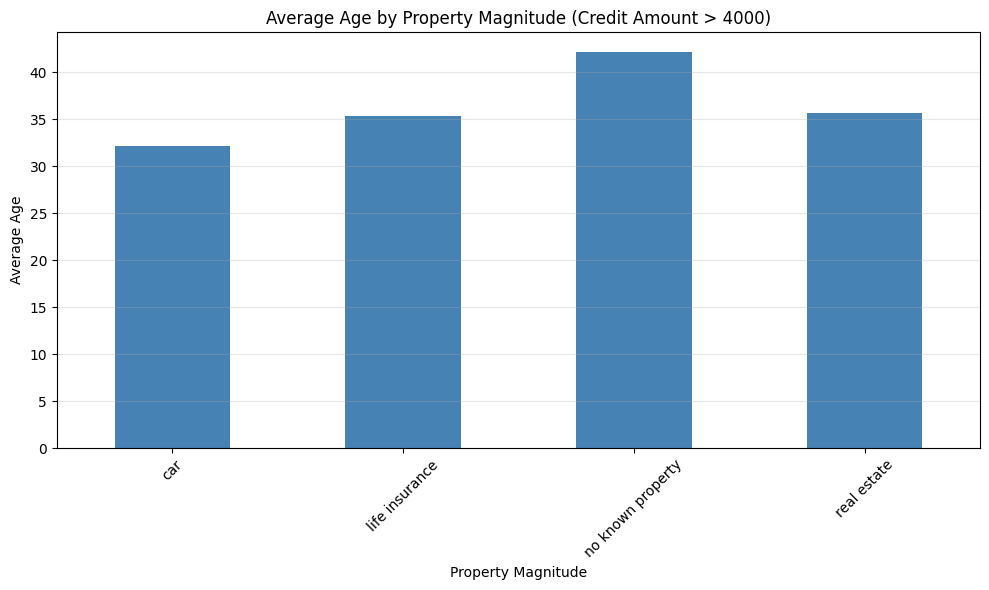

In [44]:
# Filter for credit_amount > 4000
high_credit = df[df['credit_amount'] > 4000]

# Calculate average age by property_magnitude
avg_age_by_property = high_credit.groupby('property_magnitude')['age'].mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_age_by_property.plot(kind='bar', color='steelblue')
plt.title('Average Age by Property Magnitude (Credit Amount > 4000)')
plt.xlabel('Property Magnitude')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Task 14: Pie charts - Personal status, Credit history, and Job for High savings and age > 40 (6 pts)
For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
- Personal status
- Credit history
- Job

In [ ]:
# Filter for High savings_status and age > 40
filtered_df = df[(df['savings_status'] == 'High') & (df['age'] > 40)]

# Create subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Personal status pie chart
personal_status_counts = filtered_df['personal_status'].value_counts()
axes[0].pie(personal_status_counts.values, labels=personal_status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Personal Status Distribution')

# Credit history pie chart
credit_history_counts = filtered_df['credit_history'].value_counts()
axes[1].pie(credit_history_counts.values, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Credit History Distribution')

# Job pie chart
job_counts = filtered_df['job'].value_counts()
axes[2].pie(job_counts.values, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Job Distribution')

plt.suptitle('Distribution for High Savings and Age > 40', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [47]:
print("\nProblem 2 completed successfully!")


Problem 2 completed successfully!
